In this project we will try to forecast the different petrol price

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib

In [ ]:
df1=pd.read_csv('/content/train_data.csv')
df1.head()

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


Data Analysis and splitting the data

In [ ]:
df1.isnull().sum()

Date            0
Petrol (USD)    2
dtype: int64

In [ ]:
df2=df1.dropna()
df2.rename(columns={"Petrol (USD)": "Petrol"}, inplace=True)
df2.head()

<ipython-input-4-ecc05fcc4c71>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns={"Petrol (USD)": "Petrol"}, inplace=True)


,Date,Petrol
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


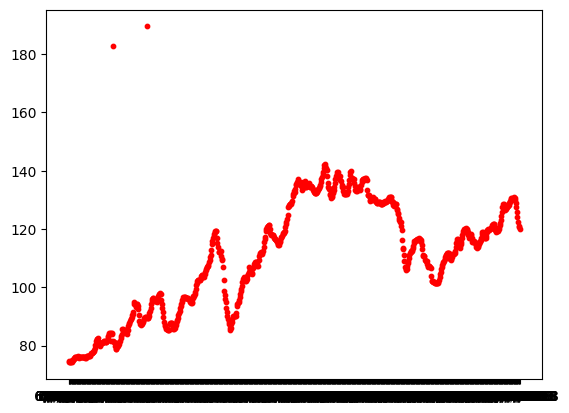

In [ ]:
plt.scatter(df2.Date,df2.Petrol,color='Red', label='Prices', s=10)

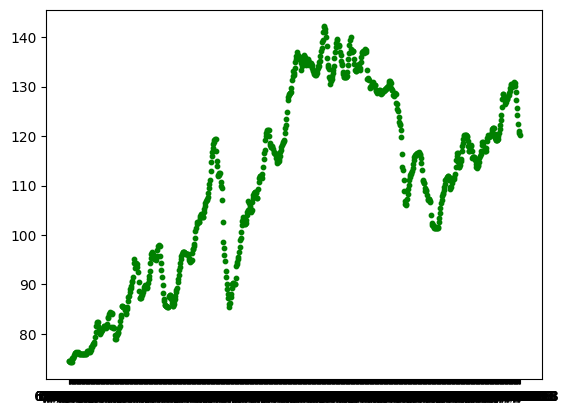

In [ ]:
df3=df2[df2.Petrol<160]
plt.scatter(df3.Date,df3.Petrol,color='green', label='Prices', s=10)

In [ ]:
df4=df3.reset_index()['Petrol']
df4.head()

0    74.59
1    74.47
2    74.42
3    74.35
4    74.28
Name: Petrol, dtype: float64

In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns

In [76]:
cloth=pd.read_json("drive/MyDrive/Dataset/cloth_yelp.json", lines=True)
cloth.head()

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [4]:
cloth['quality'].value_counts()

5.0    29604
4.0    27118
3.0    19526
2.0     5130
1.0     1344
Name: quality, dtype: int64

In [5]:
cloth.shape

(82790, 18)

In [ ]:
cloth.isnull().sum()

item_id               0
waist             79908
size                  0
quality              68
cup size           6255
hips              26726
bra size           6018
category              0
bust              70936
height             1107
user_name             0
length               35
fit                   0
user_id               0
shoe size         54875
shoe width        64183
review_summary     6725
review_text        6725
dtype: int64

In [6]:
cloth= cloth.drop(['item_id','waist'], axis= 1)
cloth.head()

,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [7]:
cloth= cloth.drop(['user_name','user_id','review_summary','review_text'], axis =  1)
cloth.head()

,size,quality,cup size,hips,bra size,category,bust,height,length,fit,shoe size,shoe width
0,7,5.0,d,38.0,34.0,new,36,5ft 6in,just right,small,NaN,NaN
1,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,just right,small,NaN,NaN
2,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,slightly long,small,9.0,NaN
3,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,just right,fit,NaN,NaN
4,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,slightly long,small,NaN,NaN


In [8]:
new_cloth=cloth.dropna(how='any')
new_cloth.shape

(7000, 12)

In [ ]:
new_cloth['cup size'].value_counts()

c         1670
d         1419
b         1325
dd/e      1031
ddd/f      612
a          453
dddd/g     263
h           89
k           40
j           35
aa          34
i           29
Name: cup size, dtype: int64

In [9]:
new_cloth['category'].value_counts()

new          1775
tops         1754
bottoms      1442
dresses      1410
outerwear     367
sale          242
wedding        10
Name: category, dtype: int64

In [ ]:
new_cloth['length'].value_counts()

just right        5231
slightly long     1012
slightly short     510
very long          197
very short          50
Name: length, dtype: int64

In [10]:
new_cloth['fit'].value_counts()

fit      4798
large    1161
small    1041
Name: fit, dtype: int64

In [11]:
#converting categorical data
from sklearn.preprocessing import LabelEncoder
def label_encoded(feat):
  le=LabelEncoder()
  le.fit(feat)
  print(feat.name,le.classes_)
  return le.transform(feat)


In [14]:
name_list = ['cup size','category','length','fit','shoe width']
for name in name_list:
  new_cloth[name]=label_encoded(new_cloth[name])

new_cloth.head()

cup size ['a' 'aa' 'b' 'c' 'd' 'dd/e' 'ddd/f' 'dddd/g' 'h' 'i' 'j' 'k']
category ['bottoms' 'dresses' 'new' 'outerwear' 'sale' 'tops' 'wedding']
length ['just right' 'slightly long' 'slightly short' 'very long' 'very short']
fit ['fit' 'large' 'small']
shoe width ['average' 'narrow' 'wide']


<ipython-input-14-34977067acb9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_cloth[name]=label_encoded(new_cloth[name])
<ipython-input-14-34977067acb9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_cloth[name]=label_encoded(new_cloth[name])
<ipython-input-14-34977067acb9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

,size,quality,cup size,hips,bra size,category,bust,height,length,fit,shoe size,shoe width
23,5,5.0,3,32.0,34.0,2,34,5ft 1in,0,2,7.0,0
40,18,5.0,6,44.0,38.0,2,43,5ft 4in,0,2,8.5,0
49,11,5.0,3,37.0,36.0,2,35,5ft 2in,1,2,6.0,0
65,9,5.0,3,42.0,38.0,2,38,5ft 2in,2,0,7.0,0
100,20,3.0,3,45.0,40.0,2,38,5ft 7in,0,0,10.0,0


In [15]:
clothes_copy=new_cloth.copy()

In [16]:
def ref1(x):
  vari = np.nan
  try:
    vari = float(x)
  except:
    vari = np.nan
  return vari
clothes_copy['bust']=clothes_copy['bust'].map(ref1)

In [ ]:
clothes_copy['bust'].isnull().sum()

1

In [ ]:
clothes_copy=clothes_copy.dropna(how='any')

In [17]:
import re
lis = clothes_copy['height'][:5].to_list()
print (lis)
k = []
p='[\d]+[.,\d]+|[\d]*[.][\d]+|[\d]+'
if re.search(p,lis[0]) is not None:
  for catch in re.finditer(p,lis[0]):
    k.append(int(catch[0]))
k

['5ft 1in', '5ft 4in', '5ft 2in', '5ft 2in', '5ft 7in']


[5, 1]

In [21]:
#Extracting data from height column
height_list=clothes_copy['height'].to_list()
updated=[]
def extractSize(x):
  numbers=[]
  p='[\d]+[.,\d]+|[\d]*[.][\d]+|[\d]+'
  if re.search(p,x) is not None:
    for catch in re.finditer(p,x):
         numbers.append(int(catch[0]))
  if len(numbers)==2:
    fina = numbers[1]+numbers[0]*12
  elif len(numbers)==1:
    fina = numbers[0]*12
  else:
    fina=np.nan
  return fina
for height in height_list:
  updated.append(extractSize(height))
clothes_copy ['height_inches']=updated

In [34]:
clothes_copy.head()

,size,quality,cup size,hips,bra size,category,bust,height,length,fit,shoe size,shoe width,height_inches
23,5,5.0,3,32.0,34.0,2,34.0,5ft 1in,0,2,7.0,0,61
40,18,5.0,6,44.0,38.0,2,43.0,5ft 4in,0,2,8.5,0,64
49,11,5.0,3,37.0,36.0,2,35.0,5ft 2in,1,2,6.0,0,62
65,9,5.0,3,42.0,38.0,2,38.0,5ft 2in,2,0,7.0,0,62
100,20,3.0,3,45.0,40.0,2,38.0,5ft 7in,0,0,10.0,0,67


In [35]:
clothes_copy['height_inches'].isnull().sum()

0

<Axes: xlabel='size'>

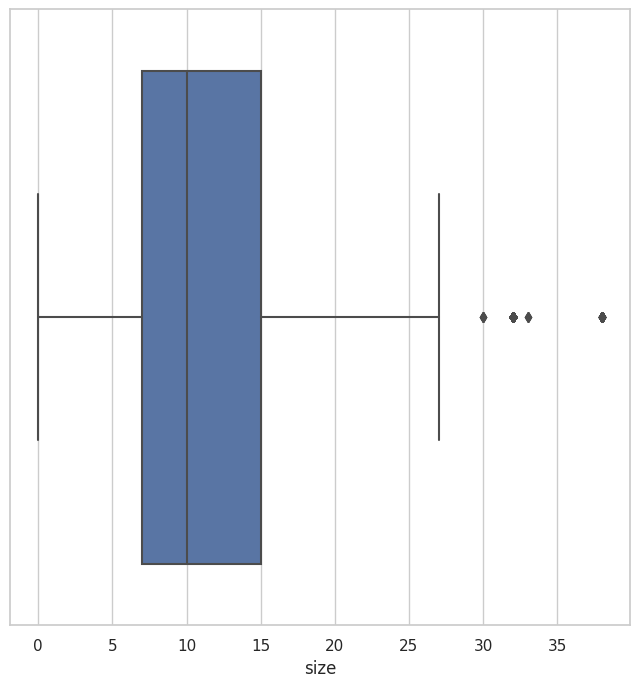

In [43]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,8))
sns.boxplot(x=clothes_copy['size'])

<Axes: xlabel='height_inches'>

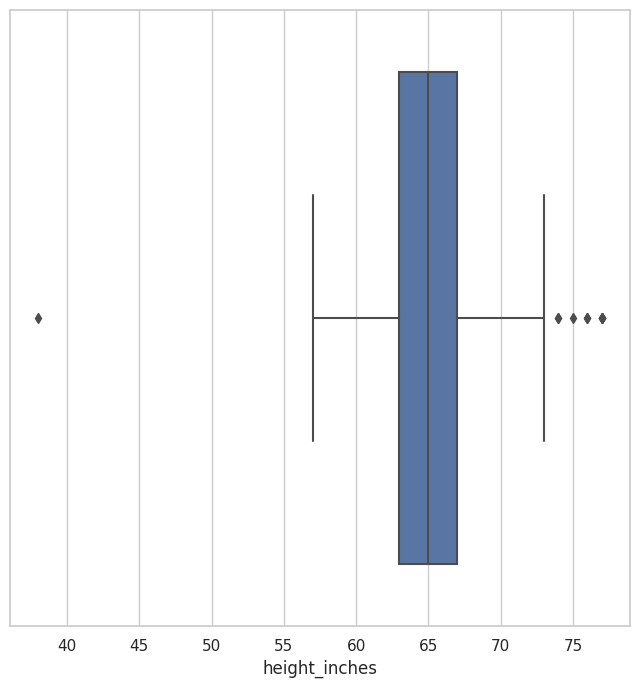

In [44]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,8))
sns.boxplot(x=clothes_copy['height_inches'])

<ipython-input-48-31a6c55f2969>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(clothes_copy.corr(),annot=True,cmap='viridis',linewidth=.5)


<Axes: >

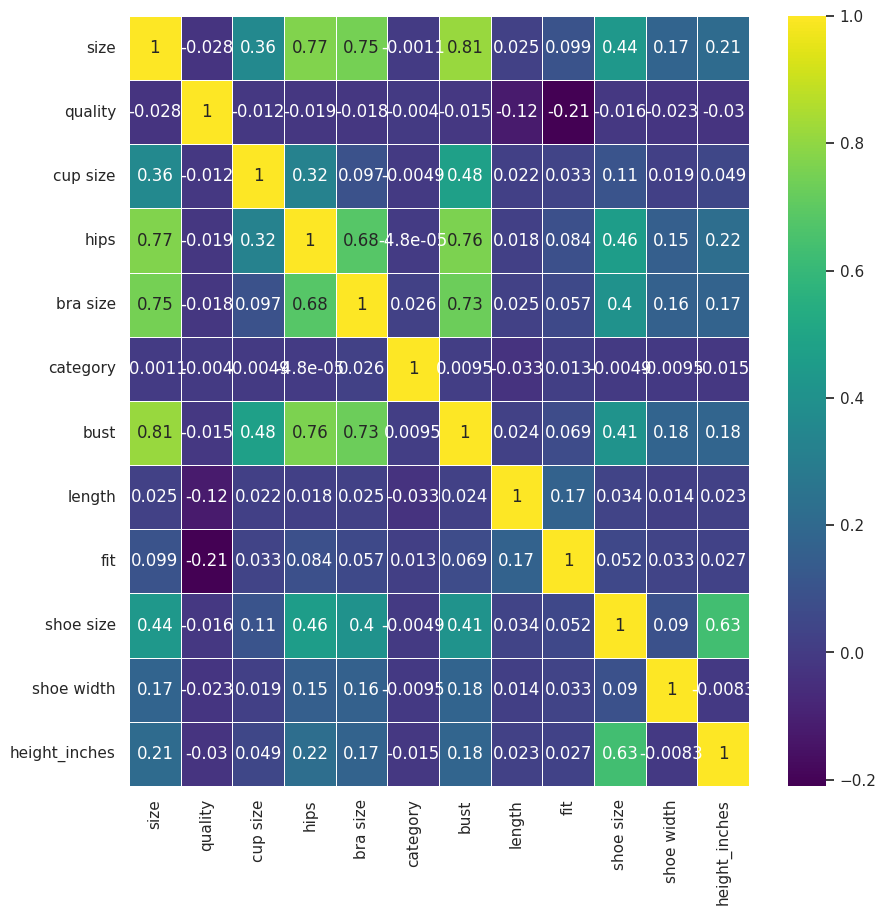

In [48]:
plt.figure(figsize=(10,10))
sns.heatmap(clothes_copy.corr(),annot=True,cmap='viridis',linewidth=.5)


In [53]:
y=clothes_copy['quality']
X=clothes_copy.drop(['quality','height','hips','bust'], axis=1)

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [58]:
Xtrain, Xtest, ytrain, ytest =train_test_split(X, y,test_size=0.2,random_state=42)
random_model=RandomForestClassifier(n_estimators=250,n_jobs=-1)

In [59]:
random_model.fit(Xtrain,ytrain)
random_model_accuracy=round(random_model.score(Xtrain,ytrain)*100,2)
print(round(random_model_accuracy,2),'%')

95.91 %


In [61]:
random_model_accuracy1=round(random_model.score(Xtest,ytest)*100,2)
print(round(random_model_accuracy1,2),'%')

40.86 %


In [82]:
import pickle
saved_model=pickle.dump(random_model,open('drive/MyDrive/Dataset/Models/Clothes.pickle','wb'))

IsADirectoryError: ignored